In [2]:
import mne                                                              # Librería de python para explorar, visualizar,
mne.set_log_level('WARNING')                                            # y analizar datos neurofisiológicos humanos.
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb                                                    
color = ['green', 'blue','red','cyan', 'magenta', 'yellow','k','w']     # Paleta de colores para diferenciar las ondas

import a_funciones as a_fun                                             # Funciones Alex

xlabel = 'Muestra'                                                      # Abscisas
ylabel = 'Amplitud (uV)'                                                # Ordenadas

#### Análisis de la señal flash  
Esta señal contiene los puntos de muestra donde comienza cada parpadeo: (identificación del punto de muestra, duración, estimulación, hit/nohit).  
Se encuentran específicamente dentro del archivo accesando al array *t_flash = mat['data'][0][0][4]*.  
En la función DrugSignal sólo usa las columnas 0 y 3. 

Mas info: [*P300-Dataset. Kaggle.*](https://www.kaggle.com/datasets/rramele/p300samplingdataset)

In [3]:
mat = scipy.io.loadmat('./dataset/p300-subject-25.mat')    
t_flash = mat['data'][0][0][4]
df_t_flash = a_fun.to_df(t_flash)
df_t_flash.head(5)

,0,1,2,3,sample
0,7499,33,11,1,0
1,7564,32,1,1,1
2,7627,33,9,1,2
3,7690,30,6,1,3
4,7750,33,8,2,4


In [4]:
df_t_flash.describe()

,0,1,2,3,sample
count,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000
mean,181668.002143,30.970238,6.500000,1.166667,2099.500000
std,101288.416332,3.861229,3.452464,0.372722,1212.579894
min,7499.000000,9.000000,1.000000,1.000000,0.000000
25%,93340.750000,30.000000,3.750000,1.000000,1049.750000
50%,181672.500000,32.000000,6.500000,1.000000,2099.500000
75%,269993.000000,32.000000,9.250000,1.000000,3149.250000
max,355828.000000,111.000000,12.000000,2.000000,4199.000000


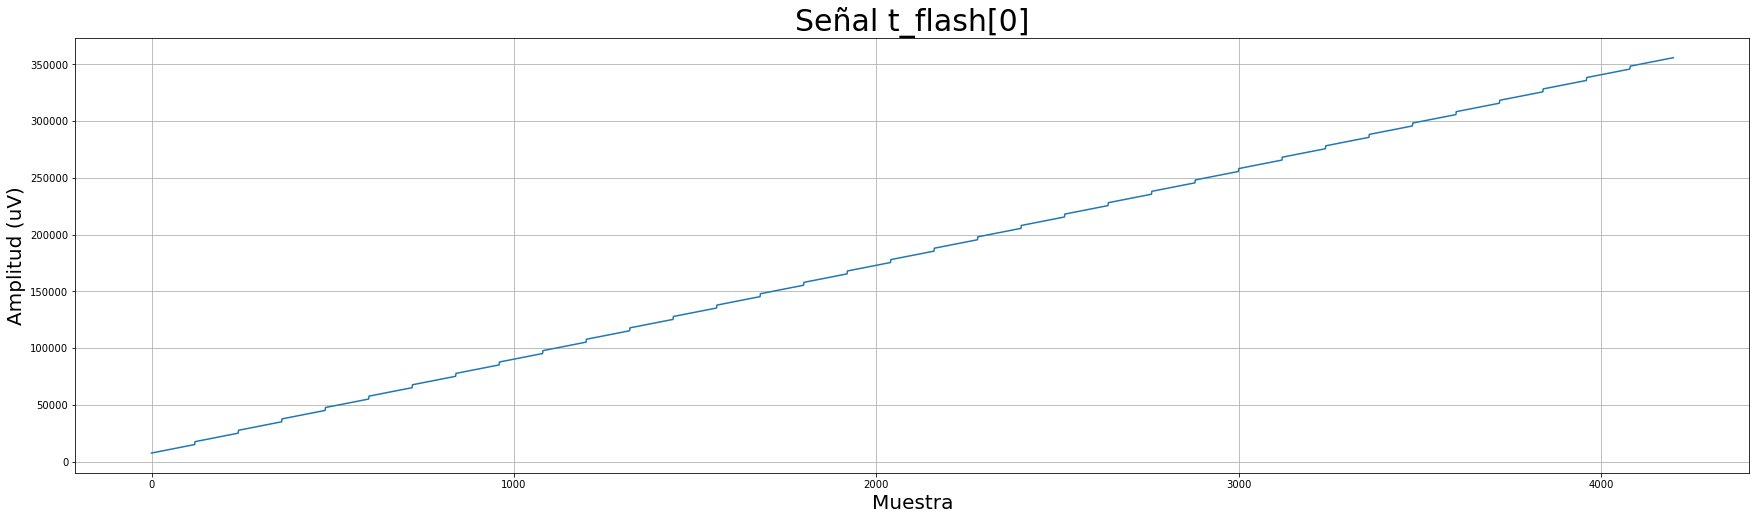

(None, None)

In [10]:
plt.figure(figsize=(30,8))
axes = plt.gca()
plt.plot(df_t_flash['sample'], df_t_flash[0])
axes.set_title('Señal t_flash[0]'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.savefig("./a_images/t_flash[0].jpg")
plt.grid(), plt.show()

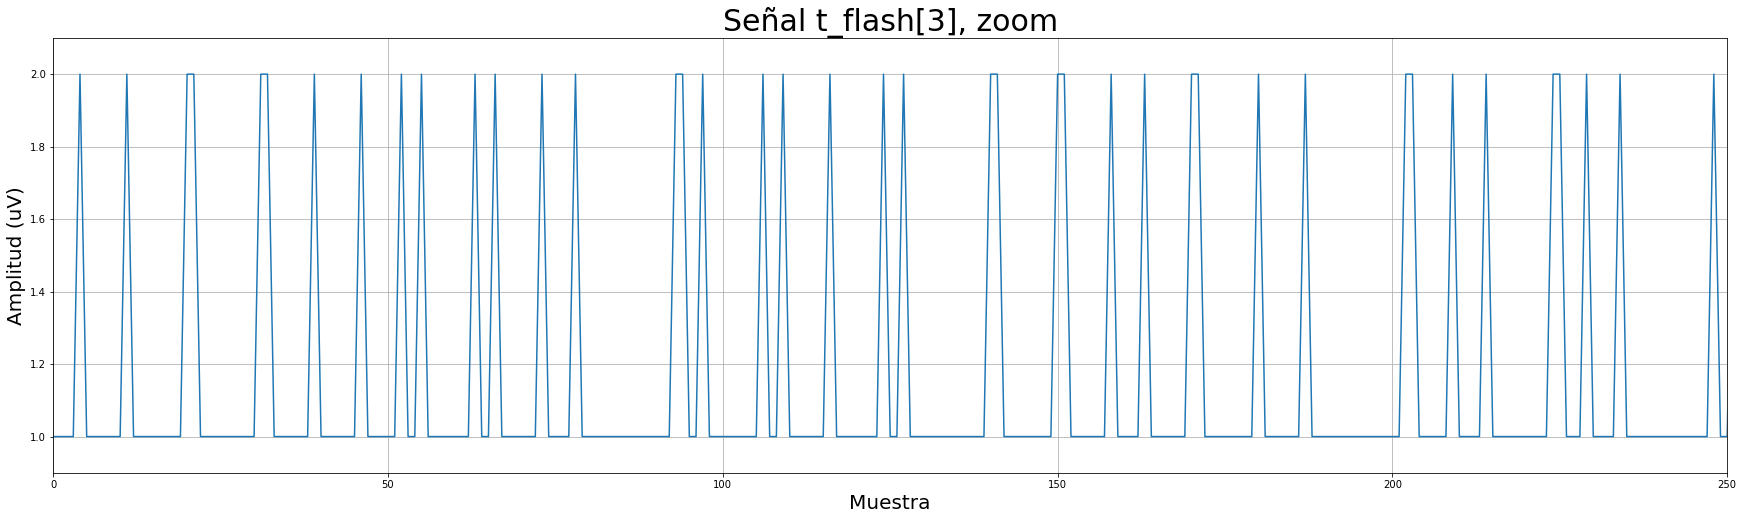

(None, None)

In [12]:
plt.figure(figsize=(30,8))
axes = plt.gca()
plt.plot(df_t_flash['sample'], df_t_flash[3])
axes.set_title('Señal t_flash[3], zoom'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.xlim([0,250]), plt.ylim([0.9,2.1])
plt.savefig("./a_images/t_flash[3]_zoom.jpg")
plt.grid(), plt.show()

In [7]:
df_t_flash[3].describe()

count    4200.000000
mean        1.166667
std         0.372722
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: 3, dtype: float64

In [8]:
df_t_flash[3].head(10)

0    1
1    1
2    1
3    1
4    2
5    1
6    1
7    1
8    1
9    1
Name: 3, dtype: int32

In [9]:
df_t_flash2 = df_t_flash
df_t_flash2[3].value_counts()


1    3500
2     700
Name: 3, dtype: int64